In [1]:
import os,sys
import numpy as np
import psycopg2
import getpass
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLSResults
from statsmodels.tools.tools import add_constant

plt.style.use('seaborn')

# Import custom scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src/python")

from spending_per_customer import SpendingPerCustomer
from subscription_income import SubscriptionIncome
from customer_retention import CustomerRetention
from album_sales import AlbumSales

# SpendingPerCustomer

In [2]:
spending = SpendingPerCustomer()
df_spending = spending.get_spending_per_customer()

Executing query...

   customer_id  cx_total_spent
0      69751.0           25207
1      15949.0           22064
2      26842.0           19368
3      21034.0           18894
4       3729.0           16385

Results returned as pandas DataFrame


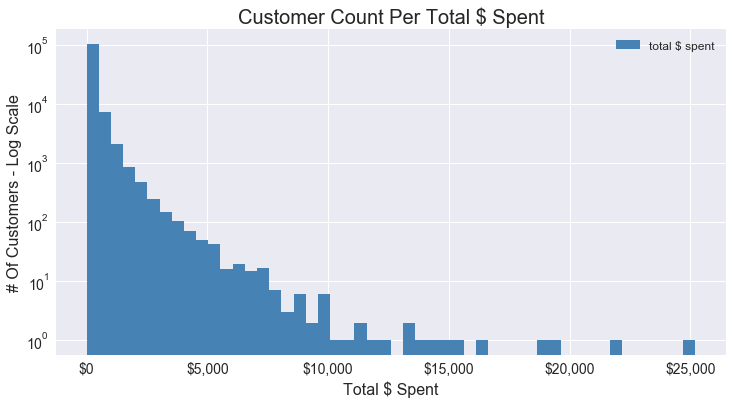

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.hist(df_spending['cx_total_spent'], label='total $ spent', bins=50, color='steelblue')
ax.set_xlabel('Total $ Spent', fontsize=16)
ax.set_ylabel('# Of Customers - Log Scale', fontsize=16)
ax.set_title("Customer Count Per Total $ Spent", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best', fontsize='large', facecolor='white')
plt.yscale('log')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'));



# Subscrpition Income

In [4]:
subscr_income = SubscriptionIncome()
df_subscr_income = subscr_income.get_subscription_income()

Executing query...

                 price
received_at           
2018-03       46003.00
2018-04      280931.00
2018-05      721258.00
2018-06      698530.00
2018-07      704071.00
2018-08      586110.00
2018-09      577742.00
2018-10      585276.00
2018-11      682238.00
2018-12      645774.00
2019-01      748940.00
2019-02      621277.00
2019-03      769621.00
2019-04      650913.00
2019-05      605824.00
2019-06      665932.00
2019-07      555845.00
2019-08      497499.00
2019-09      565692.00

Results returned as pandas DataFrame


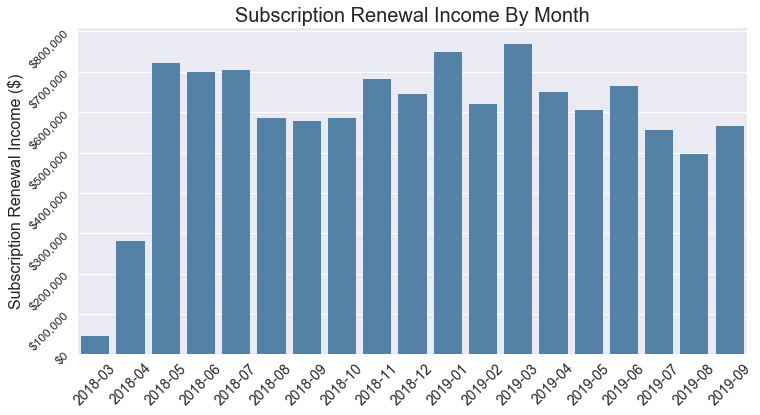

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.barplot(x=df_subscr_income.index, y=df_subscr_income['price'], color='steelblue')
ax.set_ylabel('Subscription Renewal Income ($)', fontsize=16)
ax.set_xlabel('')
plt.title('Subscription Renewal Income By Month', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'));

## Calculating Customer Retention

In [6]:
retention = CustomerRetention()
retention.get_retention_data()
df_retention = retention.monthly_cx_retention()

Executing query...

Customer Retention for 2017-01: 97.3%
Customer Retention for 2017-02: 90.2%
Customer Retention for 2017-03: 92.5%
Customer Retention for 2017-04: 92.8%
Customer Retention for 2017-05: 89.8%
Customer Retention for 2017-06: 90.9%
Customer Retention for 2017-07: 86.5%
Customer Retention for 2017-08: 88.1%
Customer Retention for 2017-09: 93.5%
Customer Retention for 2017-10: 86.5%
Customer Retention for 2017-11: 88.3%
Customer Retention for 2017-12: 91.1%
Customer Retention for 2018-01: 90.9%
Customer Retention for 2018-02: 90.5%
Customer Retention for 2018-03: 91.5%
Customer Retention for 2018-04: 79.9%
Customer Retention for 2018-05: 77.8%
Customer Retention for 2018-06: 81.4%
Customer Retention for 2018-07: 78.4%
Customer Retention for 2018-08: 83.5%
Customer Retention for 2018-09: 83.8%
Customer Retention for 2018-10: 81.3%
Customer Retention for 2018-11: 82.1%
Customer Retention for 2018-12: 78.9%
Customer Retention for 2019-01: 77.1%
Customer Retention for 2019-02

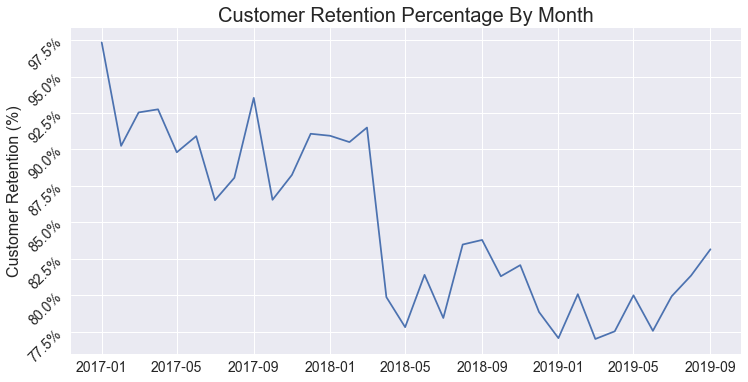

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(df_retention['period_start_date'],
              df_retention['customer_retention_pct'])
ax.set_ylabel('Customer Retention (%)', fontsize=16)
ax.set_xlabel('')
# ax.xaxis.set_ticks(df_retention['period_start_date'])
plt.title('Customer Retention Percentage By Month', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(rotation=45, fontsize=14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}%'));

## Exploring Correlation Between Album Attributes And Sales Numbers

In [8]:
sales = AlbumSales()
sales.get_sales_data()
df_album_sales = sales.clean_sales_data()

Executing query...



/Users/timothymiller/Galvanize/capstone_2/Vinyl_Me_Please/src/python/album_sales.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  + df_record_sales['jacket_type']
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/timothymiller/Galvanize/capstone_2/Vinyl_Me_Please/src/python/album_sales.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the


Results returned as pandas DataFrame


/Users/timothymiller/Galvanize/capstone_2/Vinyl_Me_Please/src/python/album_sales.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda x: 0 if str(x).lower() == 'standard' else x)
/Users/timothymiller/Galvanize/capstone_2/Vinyl_Me_Please/src/python/album_sales.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda x: 1 if str(x) == '180' else x)
/Users/timothymiller/Galvanize/capstone_2/Vinyl_Me_Please/src/python/album_sales.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [9]:
df_album_sales.head(4)

,max_sales,product_id,name,exclusive,download_code,lp_count,weight,numbered,tip_on,gatefold,custom_color,recent_release
0,24559,829,Gorillaz 'Demon Days',0,0,2.0,0,0,0,1,1,0
1,23564,1324,The Notorious B.I.G. 'Ready to Die',0,0,2.0,0,0,0,0,1,0
2,23134,900,Fiona Apple 'Tidal',0,0,2.0,1,0,0,1,0,0
3,21181,1781,"Arctic Monkeys 'Whatever People Say I Am, That...",0,0,1.0,1,0,0,0,1,0


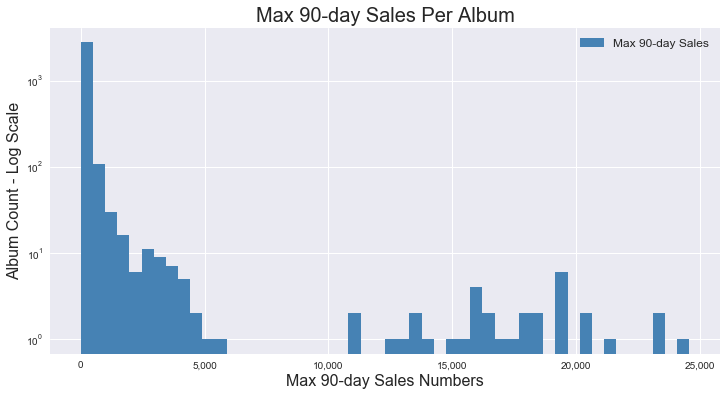

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist((df_album_sales['max_sales']), label = 'Max 90-day Sales', bins=50, color='steelblue')
ax.set_xlabel('Max 90-day Sales Numbers', fontsize=16)
ax.set_ylabel('Album Count - Log Scale', fontsize=16)
ax.set_title("Max 90-day Sales Per Album", fontsize=20)
ax.legend(loc='best', fontsize='large', facecolor='white')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
plt.yscale('log');

In [11]:
df_model = df_album_sales.drop(columns=['product_id', 'name'])
X = df_model.drop(columns=['max_sales'])
y = df_model['max_sales']

### Heatmap of Sales vs. Album Attributes

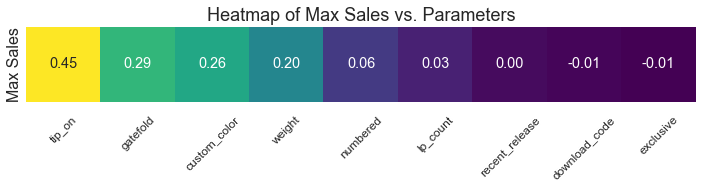

In [12]:
corr_matrix = df_model.corr()
heat = corr_matrix["max_sales"].sort_values(ascending=False)[1:]
heat = pd.DataFrame(heat)

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(rotation=45, fontsize=12)
sns.heatmap(heat.T, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=False)
ax.set_title("Heatmap of Max Sales vs. Parameters", fontsize=18)
ax.get_yaxis().set_ticks([])
ax.set_ylabel('Max Sales', fontsize=16);

### VIF calculation

In [13]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.to_numpy(), i)
                     for i in range(X.shape[1])]
vif["features"] = X.columns

In [14]:
vif.round(1)

,VIF Factor,features
0,1.1,exclusive
1,1.2,download_code
2,1.4,lp_count
3,1.3,weight
4,1.7,numbered
5,1.3,tip_on
6,1.1,gatefold
7,2.2,custom_color
8,1.5,recent_release


#### Variance inflation factor calculation shows that no features are significantly corellated, so none of them need to be removed.

## Linear Regression Model

In [15]:
linear_model = LinearRegression()
linear_model.fit(X.to_numpy(), y.to_numpy());

In [16]:
coef_df = pd.DataFrame({'Feature': X.columns,
                        'Sales Impact (# sold)': linear_model.coef_},
                        index=None).round(0)

In [17]:
coef_df.sort_values(by=['Sales Impact (# sold)'], ascending=False)

,Feature,Sales Impact (# sold)
5,tip_on,4781.0
6,gatefold,1922.0
7,custom_color,1511.0
3,weight,33.0
2,lp_count,-6.0
1,download_code,-192.0
8,recent_release,-335.0
4,numbered,-1056.0
0,exclusive,-1170.0


#### Table above shows modeled change in total number of albums sold based on going from "not Feature" to "yes Feature", or for an increase of 1 unit in the case of lp_count.

### Performing an Ordinary Least Squares Regression using the statsmodels Python package

In [18]:
X_const = add_constant(X)
est=sm.OLS(y, X_const)
est = est.fit()
est.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              max_sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     130.9
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          2.29e-208
Time:                        10:33:08   Log-Likelihood:                -26430.
No. Observations:                3007   AIC:                         5.288e+04
Df Residuals:                    2997   BIC:                         5.294e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            110.7398     56.899      1.946      0.052      -0.825     222.305
exclusive      -1169.5536    351.734     -3.325      0.001   -1859.219    -479.889
download_code   -191.5540    127.030     -1.508      0.132    -440.628      57.520
lp_count          -6.4626     41.365     -0.156      0.876     -87.570      74.645
weight            33.1854    110.981      0.299      0.765    -184.421     250.792
numbered       -1056.2641    135.441     -7.799      0.000   -1321.831    -790.698
tip_on          4780.6486    221.746     21.559      0.000    4345.859    5215.438
gatefold        1922.1300    204.936      9.379      0.000    1520.300    2323.960
custom_color    1510.7053    104.296     14.485      0.000    1306.206    1715.205
recent_release  -335.3128     84.941     -3.948      0.000    -501.862    -168.763
==============================================================================
Omnibus:                     4085.204   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           983561.917
Skew:                           7.710   Prob(JB):                         0.00
Kurtosis:                      90.249   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### download_code, lp_count, and weight are not significant with a 95% confidence interval, so we will drop them and re-fit.

In [19]:
X_drop = X.drop(columns=['download_code', 'lp_count', 'weight'])

In [20]:
linear_model_drop = LinearRegression()
linear_model_drop.fit(X_drop.to_numpy(), y.to_numpy());

In [21]:
coef_df_drop = pd.DataFrame({'Feature': X_drop.columns, 'Sales Impact (# sold)': linear_model_drop.coef_}, index=None).round(2)
coef_df_drop.sort_values(by=['Sales Impact (# sold)'], ascending=False)

,Feature,Sales Impact (# sold)
2,tip_on,4814.99
3,gatefold,1907.17
4,custom_color,1501.43
5,recent_release,-364.32
1,numbered,-1040.34
0,exclusive,-1172.53


In [22]:
X_const_drop = add_constant(X_drop)
est_drop = sm.OLS(y, X_const_drop)
est_drop = est_drop.fit()
est_drop.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              max_sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     196.0
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          2.98e-211
Time:                        10:33:08   Log-Likelihood:                -26432.
No. Observations:                3007   AIC:                         5.288e+04
Df Residuals:                    3000   BIC:                         5.292e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             99.6242     33.357      2.987      0.003      34.220     165.029
exclusive      -1172.5347    351.597     -3.335      0.001   -1861.929    -483.140
numbered       -1040.3367    135.008     -7.706      0.000   -1305.054    -775.619
tip_on          4814.9933    206.944     23.267      0.000    4409.227    5220.760
gatefold        1907.1657    204.266      9.337      0.000    1506.650    2307.682
custom_color    1501.4282    103.308     14.534      0.000    1298.866    1703.990
recent_release  -364.3166     82.756     -4.402      0.000    -526.581    -202.052
==============================================================================
Omnibus:                     4086.899   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986441.549
Skew:                           7.715   Prob(JB):                         0.00
Kurtosis:                      90.379   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

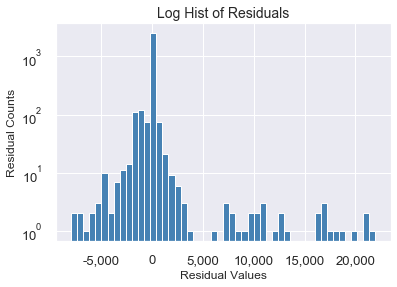

In [23]:
y_hat = linear_model_drop.predict(X_drop.to_numpy())
residuals = y.to_numpy() - y_hat

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(residuals, bins=50, color='steelblue')
ax.set_xlabel('Residual Values', fontsize=12)
ax.set_ylabel('Residual Counts', fontsize=12)
ax.set_title("Log Hist of Residuals", fontsize=14)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.yscale('log');

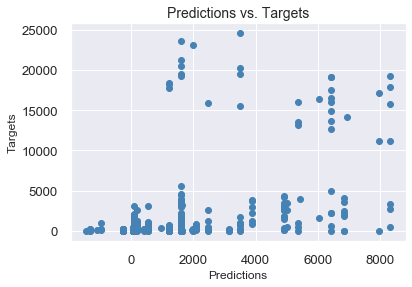

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(y_hat, y, color='steelblue')
ax.set_xlabel('Predictions', fontsize=12)
ax.set_ylabel('Targets', fontsize=12)
ax.set_title("Predictions vs. Targets", fontsize=14);

## Linear Regression Model With Log-Transformed Target

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

### Outcome variable is log transformed

Coefficients:
In the original scale of the variable, the exponent of the coefficient is the ratio of the geometric mean of that factor over the geometric mean of the base case. In terms of percent change, we can say that switching from not parameter to parameter, we expect to see about exp(coeff)*100 % increase in the geometric mean of the results.

Geometric mean is less sensitive to outliers. (a*b*c)**1/3

In [25]:
linear_model = LinearRegression()
linear_model.fit(X.to_numpy(), np.log(y.to_numpy()+1));

In [26]:
coef_df = pd.DataFrame({'Feature': X.columns,
                        'Log Sales Impact (# sold)': linear_model.coef_},
                        index=None).round(0)

In [27]:
coef_df.sort_values(by=['Log Sales Impact (# sold)'], ascending=False)

,Feature,Log Sales Impact (# sold)
5,tip_on,3.0
4,numbered,1.0
6,gatefold,1.0
7,custom_color,1.0
0,exclusive,-0.0
1,download_code,-0.0
2,lp_count,-0.0
3,weight,0.0
8,recent_release,-1.0


In [28]:
X_const = add_constant(X)
est=sm.OLS(np.log(y+1), X_const)
est = est.fit()
est.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              max_sales   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     125.2
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          2.33e-200
Time:                        10:33:11   Log-Likelihood:                -5239.6
No. Observations:                3007   AIC:                         1.050e+04
Df Residuals:                    2997   BIC:                         1.056e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7693      0.049     76.153      0.000       3.672       3.866
exclusive         -0.2558      0.306     -0.836      0.403      -0.856       0.344
download_code     -0.1783      0.111     -1.613      0.107      -0.395       0.038
lp_count          -0.1071      0.036     -2.978      0.003      -0.178      -0.037
weight             0.0992      0.097      1.027      0.304      -0.090       0.288
numbered           1.1289      0.118      9.581      0.000       0.898       1.360
tip_on             2.8880      0.193     14.972      0.000       2.510       3.266
gatefold           1.0091      0.178      5.660      0.000       0.660       1.359
custom_color       1.1027      0.091     12.154      0.000       0.925       1.281
recent_release    -0.5666      0.074     -7.668      0.000      -0.711      -0.422
==============================================================================
Omnibus:                       63.421   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.809
Skew:                           0.067   Prob(JB):                     2.39e-29
Kurtosis:                       4.017   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### exclusive, download_code, and weight are not significant with a 95% confidence interval. Dropping.

In [29]:
X_drop = X.drop(columns=['exclusive', 'download_code', 'weight'])

In [30]:
linear_model_drop = LinearRegression()
linear_model_drop.fit(X_drop.to_numpy(), np.log(y.to_numpy()+1));

In [31]:
coef_df_drop = pd.DataFrame({'Feature': X_drop.columns, 'Log Sales Impact (# sold)': linear_model_drop.coef_}, index=None).round(2)
coef_df_drop = coef_df_drop.sort_values(by=['Log Sales Impact (# sold)'], ascending=False)
coef_df_drop

,Feature,Log Sales Impact (# sold)
2,tip_on,2.97
1,numbered,1.16
4,custom_color,1.09
3,gatefold,1.00
0,lp_count,-0.11
5,recent_release,-0.60


In [32]:
X_const_drop = add_constant(X_drop)
est_drop = sm.OLS(np.log(y+1), X_const_drop)
est_drop = est_drop.fit()
est_drop.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              max_sales   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     187.1
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          7.75e-203
Time:                        10:33:11   Log-Likelihood:                -5241.7
No. Observations:                3007   AIC:                         1.050e+04
Df Residuals:                    3000   BIC:                         1.054e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7681      0.049     76.124      0.000       3.671       3.865
lp_count          -0.1054      0.036     -2.962      0.003      -0.175      -0.036
numbered           1.1590      0.116     10.000      0.000       0.932       1.386
tip_on             2.9706      0.180     16.493      0.000       2.617       3.324
gatefold           1.0013      0.178      5.620      0.000       0.652       1.351
custom_color       1.0870      0.088     12.296      0.000       0.914       1.260
recent_release    -0.5989      0.072     -8.341      0.000      -0.740      -0.458
==============================================================================
Omnibus:                       64.617   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.102
Skew:                           0.076   Prob(JB):                     7.59e-30
Kurtosis:                       4.023   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

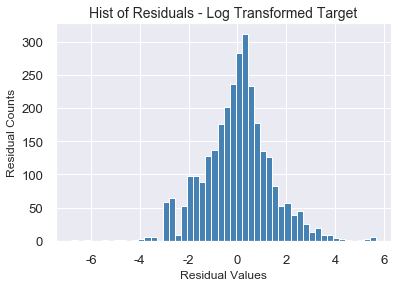

In [33]:
y_hat = linear_model_drop.predict(X_drop.to_numpy())
residuals = np.log(y.to_numpy()+1) - y_hat

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(residuals, bins=50, color='steelblue')
ax.set_xlabel('Residual Values', fontsize=12)
ax.set_ylabel('Residual Counts', fontsize=12)
ax.set_title("Hist of Residuals - Log Transformed Target", fontsize=14)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


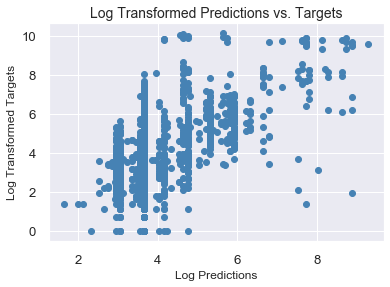

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(y_hat, np.log(y), color='steelblue')
ax.set_xlabel('Log Predictions', fontsize=12)
ax.set_ylabel('Log Transformed Targets', fontsize=12)
ax.set_title("Log Transformed Predictions vs. Targets", fontsize=14);

In [35]:
np.where(y_hat > 9)

(array([26]),)

In [36]:
X_drop.iloc[26, :]

lp_count          1.0
numbered          1.0
tip_on            1.0
gatefold          1.0
custom_color      1.0
recent_release    1.0
Name: 28, dtype: float64